## 载入函数库

In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 自定义函数库

In [18]:
###对于样例数据实现聚类
#estimator：训练好的聚类模型
#name：聚类模型名称
#data：样例数据
def clustering_calc(estimator,name,data):
    t0 = time()
    estimator.fit(data)
    print('name = %s, time = %.2fs, RI = %.3f, Silhouette = %.3f'
          % (name,(time() - t0),
             metrics.adjusted_rand_score(labels, estimator.labels_), #计算RI
             metrics.silhouette_score(data,estimator.labels_,metric='euclidean') #计算Silhouette Coefficient
            ))

In [41]:
###可视化聚类结果
#estimator：训练好的聚类模型
#name：聚类模型名称
#data：样例数据
def clustering_plot(estimator,name,data):
    #将样例数据投影到二维平面
    reduced_data = PCA(n_components=2).fit_transform(data)
    estimator.fit(reduced_data)

    #在二维平面中画出网格
    h = .02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #得到样例数据的预测标签
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    #将聚类结果上色
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    centroids = estimator.cluster_centers_
    plt.scatter(centroids[:, 0],centroids[:, 1],marker='x',s=169,linewidths=3,color='w', zorder=10)
    
    #设定图像标题和坐标轴
    plt.title('Clustering Plot of %s' %name)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

## 载入原始数据

In [4]:
np.random.seed(42)

In [5]:
digits = load_digits()
data = scale(digits.data)
labels = digits.target

In [7]:
n_samples, n_features = data.shape
n_digits = len(np.unique(labels))
print("n_digits = %d, n_samples = %d, n_features = %d" % (n_digits, n_samples, n_features))

n_digits = 10, n_samples = 1797, n_features = 64


## K-means算法

In [51]:
###K-means++
clustering_calc(estimator = KMeans(init='k-means++',n_clusters=n_digits,n_init=10), name="Kmeans++", data=data)

name = Kmeans++, time = 0.37s, RI = 0.480, Silhouette = 0.143


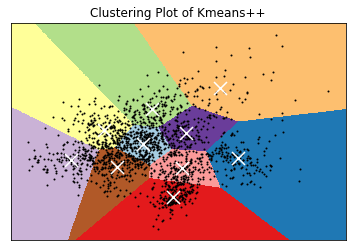

In [52]:
clustering_plot(estimator = KMeans(init='k-means++',n_clusters=n_digits,n_init=10), name="Kmeans++", data=data)

In [53]:
###K-means Random
clustering_calc(estimator = KMeans(init='random',n_clusters=n_digits,n_init=10), name="KmeansRandom", data=data)

name = KmeansRandom, time = 0.31s, RI = 0.478, Silhouette = 0.145


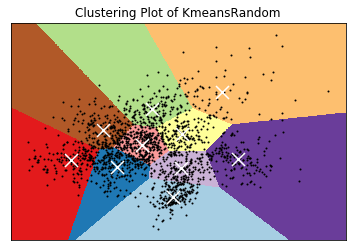

In [54]:
clustering_plot(estimator = KMeans(init='random',n_clusters=n_digits,n_init=10), name="KmeansRandom", data=data)

In [61]:
###PCA-based K-means
reduced_data = PCA(n_components=n_digits).fit_transform(data)
clustering_calc(estimator = KMeans(init='k-means++',n_clusters=n_digits,n_init=10), name="PCA-based", data=reduced_data)

name = PCA-based, time = 0.18s, RI = 0.486, Silhouette = 0.272


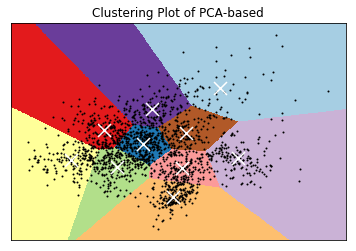

In [62]:
reduced_data = PCA(n_components=n_digits).fit_transform(data)
clustering_plot(estimator = KMeans(init='k-means++',n_clusters=n_digits,n_init=10), name="PCA-based", data=reduced_data)

## 层次聚类

In [39]:
clustering_calc(estimator = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward'), name='AgglomerativeClustering', data=data)

name = AgglomerativeClustering, time = 0.23s, RI = 0.664, Silhouette = 0.125
